# <a id='toc1_'></a>[Inaugural Project](#toc0_)

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

**Table of contents**<a id='toc0_'></a>    
- [Inaugural Project](#toc1_)    
  - [Member](#toc1_1_)    
- [Question 1](#toc2_)    
- [Question 2](#toc3_)    
- [Question 3](#toc4_)    
- [Question 4](#toc5_)    
- [Question 5](#toc6_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## <a id='toc1_1_'></a>[Member](#toc0_)
- [Emil Kjems](https://github.com/E-Kjems)

Imports and set magics:

In [102]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.optimize as opt

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import inauguralproject
from HouseholdSpecializationModel import HouseholdSpecializationModelClass
# Defining model
model = HouseholdSpecializationModelClass()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# <a id='toc2_'></a>[Question 1](#toc0_)

**Explain how you solve the model**

In [103]:
# code for solving the model (remember documentation and comments)

# a = np.array([1,2,3])
# b = inauguralproject.square(a)
# print(b)

In [104]:
# create empty list to store results
results = []

# Making the varying alpha and sigma
alpha_list = [0.25, 0.5, 0.75]
sigma_list = [0.5, 1.0, 1.5]

# loop through each combination of alpha and sigma
for alpha in alpha_list:    
    for sigma in sigma_list:
        # assigning the different value to alpha and sigma
        model.par.alpha = alpha
        model.par.sigma = sigma

        # Solving the model with the new different values of alpha and sigma
        opt = model.solve_discrete()

        # append results to list
        results.append({'alpha': alpha, 'sigma': sigma, 'HF': opt.HF, 'HM': opt.HM, 'HF/HM': opt.HF/opt.HM})

# create dataframe from results
df = pd.DataFrame(results).round({'HF/HM': 2})

# set alpha and sigma columns as index
df.set_index(['alpha', 'sigma'], inplace=True)

# apply formatting to the dataframe
styled_df = df.style.format({'HF': '{:.1f}', 'HM': '{:.1f}', 'HF/HM': '{:.2f}'})

# display the styled dataframe
display(styled_df)

/Users/emil/Desktop/6. semester/Introduction to programming and numerical analysis/projects-2023-s/inauguralproject/HouseholdSpecializationModel.py:64: RuntimeWarning: divide by zero encountered in reciprocal
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma)+par.alpha*HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))


# <a id='toc3_'></a>[Question 2](#toc0_)

Explain your code and procedure

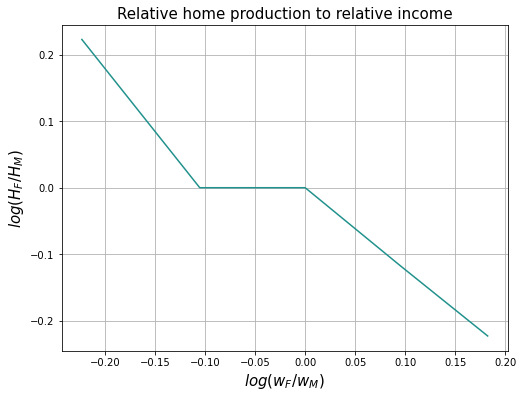

In [105]:
# Resetting alpha and sigma to their respective baseline values
model.par.alpha = 0.5
model.par.sigma = 1.0

# Defining male and female wages and retrieving them from HouseholdSpecializationModel
wF = model.par.wF_vec
wM = model.par.wM

# Creating empty lists for the values of log(HF/HM) and log(wF/wM)
log_ratio = []
log_wages = []

# Finding the optimal values for HF and HM by iteration using the discrete solver
# And appending them to the lists above
for femalewages in wF:
    model.par.wF = femalewages
    opt = model.solve_discrete()
    log_ratio.append(np.log(opt.HF/opt.HM))
    log_wages.append(np.log(femalewages/wM))

# Choose a visually appealing color palette
cmap = plt.get_cmap('viridis')

# Increase the size of the plot
fig, ax = plt.subplots(figsize=(8, 6))

# Plot log(HF/HM) and log(wF/wM) against each other
ax.plot(log_wages, log_ratio, color=cmap(0.5))

# Add grid lines
ax.grid(True, which='both')

# Add x and y axis labels and title
ax.set_xlabel("$log(w_{F}/w_{M})$", fontsize=15)
ax.set_ylabel("$log(H_{F}/H_{M})$", fontsize=15)
ax.set_title("Relative home production to relative income", fontsize=15)

# Show the plot
plt.show()

# <a id='toc4_'></a>[Question 3](#toc0_)

Explain your code and procedure

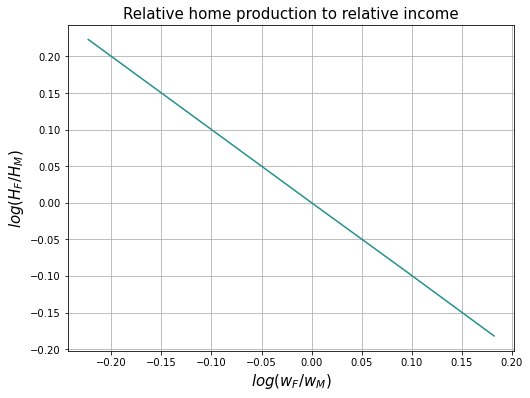

In [106]:
# Resetting alpha and sigma to their respective baseline values
model.par.alpha = 0.5
model.par.sigma = 1.0

# Defining male and female wages and retrieving them from HouseholdSpecializationModel
wF = model.par.wF_vec
wM = model.par.wM

# Creating empty lists for the values of log(HF/HM) and log(wF/wM)
log_ratio = []
log_wages = []

# Finding the optimal values for HF and HM by iteration using the continous solver
# And appending them to the lists above
for femalewages in wF:
    model.par.wF = femalewages
    opt = model.solve_continuous()
    log_ratio.append(np.log(opt.HF/opt.HM))
    log_wages.append(np.log(femalewages/wM))

# Choose a visually appealing color palette
cmap = plt.get_cmap('viridis')

# Increase the size of the plot
fig, ax = plt.subplots(figsize=(8, 6))

# Plot log(HF/HM) and log(wF/wM) against each other
ax.plot(log_wages, log_ratio, color=cmap(0.5))

# Add grid lines
ax.grid(True, which='both')

# Add x and y axis labels and title
ax.set_xlabel("$log(w_{F}/w_{M})$", fontsize=15)
ax.set_ylabel("$log(H_{F}/H_{M})$", fontsize=15)
ax.set_title("Relative home production to relative income", fontsize=15)

# Show the plot
plt.show()

# <a id='toc5_'></a>[Question 4](#toc0_)

Explain your code and procedure

In [107]:
# a. use the 'estimate' function to estimate the optimal alpha and sigma 
model.estimate()

# b. find the log H ratio 
log_H_ratio = np.log(model.sol.HF_vec/model.sol.HM_vec)

# c. construct a figure to illustrate the relationship between log H ratio and log w ratio 
fig4 = plt.figure()
ax = fig4.add_subplot(1,1,1)
# d. add the 'log_H_ratio' and the weights as scatterplot 
ax.scatter(np.log(model.par.wF_vec),log_H_ratio)
# e. add the regression from the model 
ax.plot(np.log(model.par.wF_vec),model.par.beta0_target+model.par.beta1_target*np.log(model.par.wF_vec))
# f. set title and axis labels 
ax.set_title('Log relationship between ratio of hours worked and ratio of wage')
ax.set_xlabel('$log(\omega_F/\omega_M)$')
ax.set_ylabel('$log(H_F/H_M)$')

/Users/emil/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/_minimize.py:535: RuntimeWarning: Method Nelder-Mead cannot handle constraints nor bounds.
  warn('Method %s cannot handle constraints nor bounds.' % method,


AttributeError: 'HouseholdSpecializationModelClass' object has no attribute 'solve_wF_vec'

In [ ]:
print(f"Estimated alpha: {result.x[1]:.3f}")
print(f"Estimated sigma: {result.x[0]:.3f}")

# <a id='toc6_'></a>[Question 5](#toc0_)

Explain your code and procedure

In [ ]:
# code

ADD CONCISE CONLUSION.